<a href="https://colab.research.google.com/github/hopedom/DS5/blob/main/day2_%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트: 시계열 분류
용어설명
___
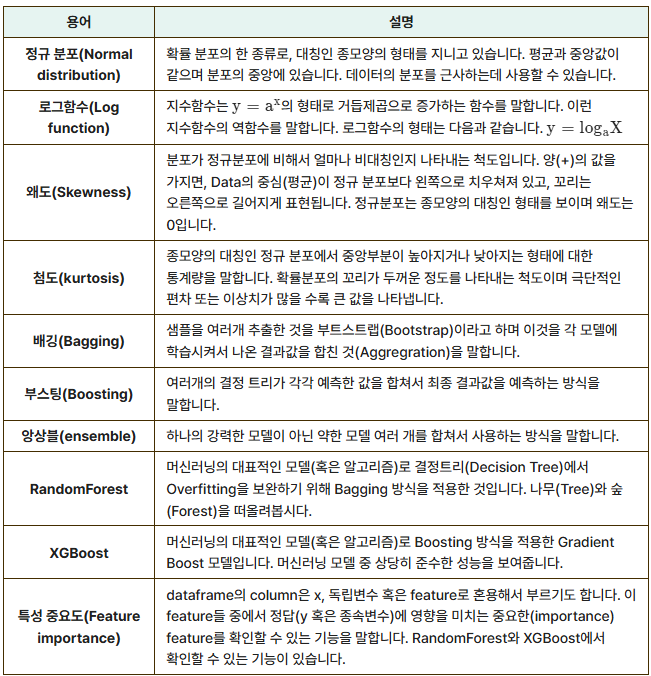

미니프로젝트의 목표!
___
- Objective 1 : 비정상 데이터를 정상 데이터로 만들어봅시다!
- Objective 2: 강의에 활용되었던 분류 모델의 성능을 높여봅시다!

미니 프로젝트
___
아래의 순서대로 코드 실습이 진행됩니다. 코드를 실행하는 부분이 어떤 순서에 해당하는지 천천히 확인해보세요.

① 비정상 데이터를 정상 데이터로 만들기  
② 분산을 일정하게 만들기 - log transformation  
③ 차분을 통해 추세 제거하기  
④ (추가) 계절 차분을 통해 계절성 제거하기  
⑤ 검정을 통해 정상성 확인하기  
⑥ 시계열 분류  

    ⑥-1 : 데이터 다운로드 및 불러오기

    ⑥-2 : 데이터셋 확인(timeseries와 y 확인)

    ⑥-3 : 데이터셋 가공

    ⑥-4 : 데이터셋 나누기

    ⑥-5 : Feature extraction

    ⑥-6 : impute

    ⑥-7 : RandomForest 및 XGBoost 사용 및 score 확인

    ⑥-8 : XGBoost plot_importance 확인 및 시각화

    ⑥-9 : Classification report를 통한 검증 및 분석

## ① 비정상 데이터를 정상 데이터로 만들기

- 데이터가 있는 폴더 연결하기
- tsfresh 설치
- 런타임 재시작
- 필요한 라이브러리 불러오기
- 데이터 불러오기

In [1]:
!pip install tsfresh

In [2]:
# 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# air passengers 데이터를 불러옵니다.
#ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')
ap = pd.read_csv('/content/drive/MyDrive/DS/6.시계열/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# 'Month' column을 삭제합니다.
ap.drop('Month', axis=1, inplace=True)

ap.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


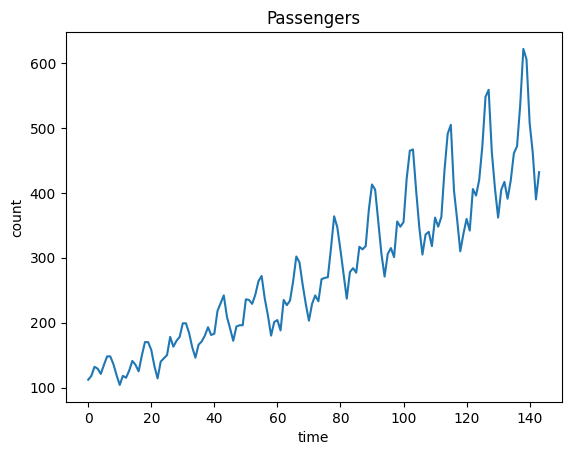

In [4]:
plt.plot(ap)
plt.title('Passengers')
plt.xlabel("time")
plt.ylabel("count")

plt.show()

## ② 분산을 일정하게 만들기 - log transformation

- log transformation을 하는 이유는 다음과 같습니다.
  - 큰 수를 같은비율의 작은 수로 만들 수 있습니다.
  - 복잡한 계산을 쉽게 만듭니다.
  - 왜도(skewness)와 첨도(kurtosis)를 줄여서 데이터 분석 시 의미있는 결과를 도출하기 위한 것입니다.

In [5]:
# np.log를 통해서 log transformation
log_transformed = np.log(ap)
log_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


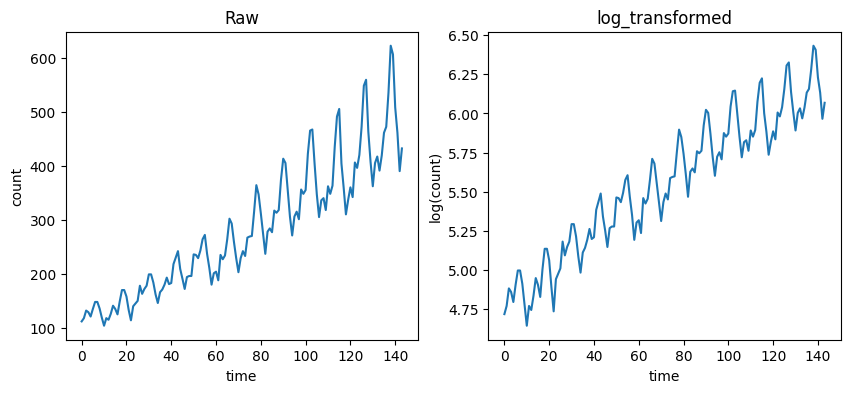

In [6]:
# 분산이 일정해진 것을 눈으로 확인할 수 있습니다.

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(ap)
plt.title('Raw')
plt.xlabel("time")
plt.ylabel("count")

plt.subplot(122)
plt.plot(log_transformed)
plt.title('log_transformed')
plt.xlabel('time')
plt.ylabel('log(count)')
plt.show()

로그 변환 후 y축 값이 로그 변환으로 인해 변동이 적어졌음

또한 데이터 추이를 봤을 때 분산이 작아짐을 확인할 수 있음

## ③ 차분을 통해 추세 제거하기

In [7]:
# diff() 함수를 통해 간단하게 차분을 수행할 수 있습니다.
log_transformed.diff()

,#Passengers
0,NaN
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


In [8]:
diffed = log_transformed.diff()[1:]
diffed

,#Passengers
1,0.052186
2,0.112117
3,-0.022990
4,-0.064022
5,0.109484
...,...
139,-0.026060
140,-0.176399
141,-0.097083
142,-0.167251


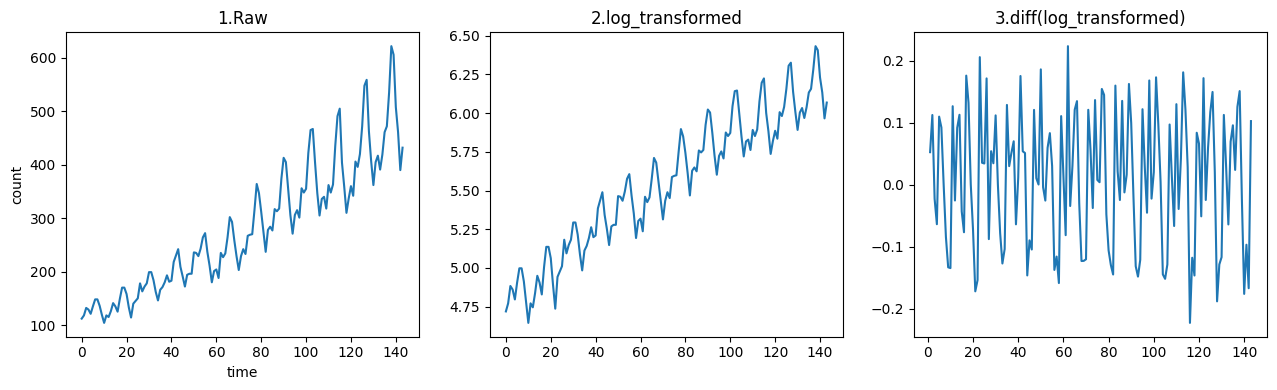

In [34]:
# 커지는 분산과 증가하는 추세를 제거한 air passengers 데이터를 얻을 수 있습니다.

plt.figure(figsize=(13,4))

plt.subplot(131)
plt.plot(ap)
plt.title('1.Raw')
plt.xlabel("time")
plt.ylabel("count")

plt.subplot(132)
plt.plot(log_transformed)
plt.title('2.log_transformed')

plt.subplot(133)
plt.plot(diffed)
plt.title('3.diff(log_transformed)')

plt.tight_layout()
plt.show()

로그변환된 데이터에 차분 적용 후,   

y축 range에서 확인할 수 있을 변동이 훨씬 적어졌음을 확인할 수 있음  
또한 데이터의 평균이 time에 따라 변하지 않아 정상성(stationary)을 갖춘 시계열 데이터 형태가 되었음을 확인할 수 있음

변환 후 이론대로 변환 시 기대효과를 충족하였음
- 로그 변환효과 --> 분산을 일정하게 만듬
- 차분 효과 --> 추세 제거 및 평균을 일정하게 만듬

## ④ (추가) 계절 차분을 통해 계절성 제거하기

AirPassengers 데이터는 12개월을 주기로 하는 계절성이 포함되어 있습니다.

이런 경우엔 계절 차분을 통해서 계절성을 데이터에서 제거할 수 있습니다.

In [10]:
# diff에 12라는 값을 넣어주면 주기를 12로 하는 계절 차분을 수행할 수 있습니다.
seasonally_diffed = diffed.diff(12)
seasonally_diffed

,#Passengers
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


In [11]:
# 차분을 하면 데이터가 짧아지기 때문에 빈칸을 제거해야 합니다.
seasonally_diffed.dropna(inplace = True)
seasonally_diffed

,#Passengers
13,0.039164
14,0.000361
15,-0.020496
16,-0.012939
17,0.066148
...,...
139,-0.045934
140,0.012024
141,0.031830
142,-0.050082


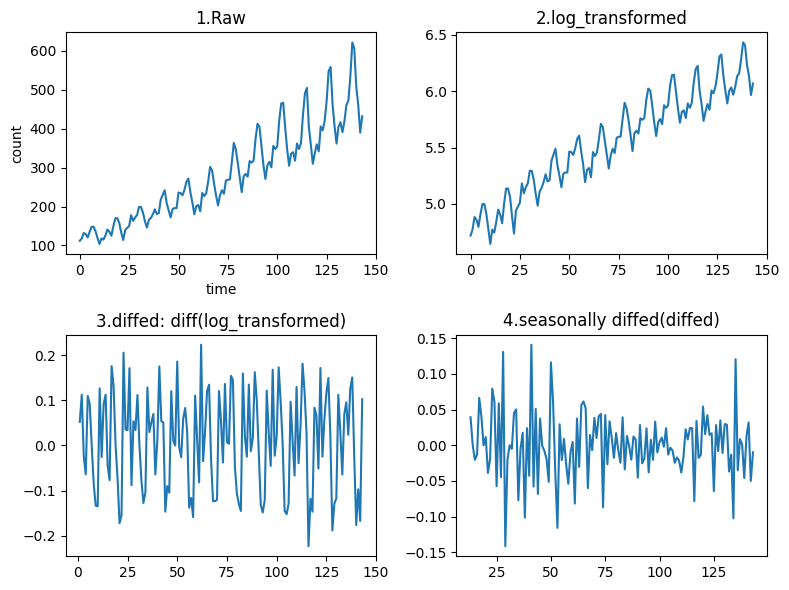

In [37]:
# 아래와 같은 데이터를 얻을 수 있습니다.

plt.figure(figsize=(8,6))

plt.subplot(221)
plt.plot(ap)
plt.title('1.Raw')
plt.xlabel("time")
plt.ylabel("count")

plt.subplot(222)
plt.plot(log_transformed)
plt.title('2.log_transformed')

plt.subplot(223)
plt.plot(diffed)
plt.title('3.diffed: diff(log_transformed)')

plt.subplot(224)
plt.plot(seasonally_diffed)
plt.title('4.seasonally diffed(diffed)')

plt.tight_layout()
plt.show()

차분된 데이터(`diffed`)에 추가로 계절성 차분 후 시각화한 결과,

계절성이 차분된 시계열 데이터(`seasonally diffed`)는 평균은 일정해보이지만 분산은 다소 차이가 있어보임  
주기적인 계절성이 제거되었기 때문에 나타난 변화라고 생각됨

정상성 여부는 검정을 통해 확인할 필요가 있음  

## ⑤ 검정을 통해 정상성 확인하기
- adfuller : Python에서 statsmodels을 통해 ADF(Augmented Dickey-Fuller) Test를 할 수 있습니다. 앞서 Classification report를 통해 Logistic Regression 모델을 검증한 것과 마찬가지로 시계열 데이터를 통계 분석하고 검증할 때 사용합니다. adfuller를 사용하면 대표적으로 다음과 같은 값을 얻을 수 있습니다.
  - adf(단위근 검정, Augmented Dickey Fuller) : 정상성을 확인하기 위한 단위근 검정방법
  - p-value(유의 검정) : 관찰된 데이터가 귀무가설이 맞다면 통계값 1이 실제로 관측된 값 이상일 확률
  - usedlag : 사용된 시차의 수
  - nobs : ADF 회귀 및 임계값 계산에 사용된 관측치의 수
  - critical values(임계값) : 1%, 5% 및 10% 수준에서 테스트 통계에 대한 임계값
  - icbest : 0, 1, …, maxlag 값 중 lag 길이를 자동으로 결정할 때 autolag를 사용하며 이때 autolag를 none으로 지정할 수 있는데 none으로 지정하지 않는 경우 최대화된 정보 기준

In [48]:
from statsmodels.tsa.stattools import adfuller

def adf_test(x): # adf검정을 위한 함수 정의
    stat, p_value, lags, nobs, crit, icb = adfuller(x) # adfuller 함수를 이용하면 6가지 output이 나옵니다.
    print('ADF statistics')
    print(stat) # ADF 검정 통계량입니다.
    print('P-value')
    print(p_value) # P-value입니다.
    return stat, p_value

res_adf = []
for dataset in ['ap', 'log_transformed', 'diffed', 'seasonally_diffed']:
  print('--' *50)
  print(f'ADF test of dataset: {dataset}')
  print('--' *50)
  stat, p_value = adf_test(locals()[dataset])
  res_adf.append(p_value < 0.05)

print('--' *50)
print(res_adf)

----------------------------------------------------------------------------------------------------
ADF test of dataset: ap
----------------------------------------------------------------------------------------------------
ADF statistics
0.8153688792060498
P-value
0.991880243437641
----------------------------------------------------------------------------------------------------
ADF test of dataset: log_transformed
----------------------------------------------------------------------------------------------------
ADF statistics
-1.7170170891069683
P-value
0.4223667747703874
----------------------------------------------------------------------------------------------------
ADF test of dataset: diffed
----------------------------------------------------------------------------------------------------
ADF statistics
-2.717130598388114
P-value
0.07112054815086184
----------------------------------------------------------------------------------------------------
ADF test of dataset:


ADF 검정
- 정상성을 위해 변환에 활용되었던 dataset별로 ADF test를 진행하였음
  - 귀무 가설(H₀): 시계열에 단위근이 존재한다. (비정상적이다)

  - 대립 가설(H₁): 시계열이 정상성을 만족한다.

ADF 검정 결과
- 유의수준을 5%로 설정했을 때, `seasonally_diffed`의 P-value만 `0.00024`로 정상성을 만족한다는 결론을 얻었음

KPSS 검정: 정상성 확인을 위해 추가 진행하였음

In [64]:
from statsmodels.tsa.stattools import kpss

def kpss_test(x): # kpss 검정을 위한 함수 정의
    stat, p_value, _, _ = kpss(x)
    print('KPSS statistics')
    print(stat) # ADF 검정 통계량입니다.
    print('P-value')
    print(p_value) # P-value입니다.
    return stat, p_value

res_kpss = []
for dataset in ['ap', 'log_transformed', 'diffed', 'seasonally_diffed']:
  print('--' *50)
  print(f'KPSS test of dataset: {dataset}')
  print('--' *50)
  stat, p_value = kpss_test(locals()[dataset])
  res_kpss.append(p_value > 0.05)

print('--' *50)
print(res_kpss)

----------------------------------------------------------------------------------------------------
KPSS test of dataset: ap
----------------------------------------------------------------------------------------------------
KPSS statistics
1.6513122354165206
P-value
0.01
----------------------------------------------------------------------------------------------------
KPSS test of dataset: log_transformed
----------------------------------------------------------------------------------------------------
KPSS statistics
1.6686513235125748
P-value
0.01
----------------------------------------------------------------------------------------------------
KPSS test of dataset: diffed
----------------------------------------------------------------------------------------------------
KPSS statistics
0.03830446954674065
P-value
0.1
----------------------------------------------------------------------------------------------------
KPSS test of dataset: seasonally_diffed
-----------------


KPSS 검정
- 정상성을 위해 변환에 활용되었던 dataset별로 ADF test를 진행하였음
  - 귀무 가설(H₀): 시계열이 정상적이다.

  - 대립 가설(H₁): 시계열이 비정상적이다.

KPSS 검정 결과
- 유의수준을 5%로 설정했을 때, `diffed`와 `seasonally_diffed`의 P-value가 `0.1`로 정상성을 만족한다는 결론을 얻었음

In [61]:
result = pd.DataFrame({
    'KPSS_test': res_kpss,
    'ADF_test':res_adf
}, index = ['raw', 'log_transformed', 'diffed', 'seasonally_diffed'])
result

,KPSS_test,ADF_test
raw,False,False
log_transformed,False,False
diffed,True,False
seasonally_diffed,True,True


검정 결과 종합
- 원 데이터(`raw`), 로그 변환 데이터(`log_transformed`):

  두 검정에서 모두 `False`로 나타나며, 비정상적(non-stationary) 데이터로 판별되었음
- 차분 데이터(`diffed`):

  KPSS 검정에서는 `True` 하지만 ADF 검정에서는 `False`로 판별되었음  
  KPSS 검정 결과에 가중치를 두면, 정상성을 가지는 데이터로 분류할 수 있음

- 계절 차분 데이터(`seasonally_diffed`):

  두 검정에서 모두 `True`로 나타나며, 정상적인 데이터로 판별되었음



## ⑥ 시계열 분류

강의 때 Logistic Regression을 이용한 시계열 분류가 낮은 score를 보였습니다.

앙상블 모델과 더 많은 특징을 활용해서 분류 성능을 높여봅시다!






In [15]:
# ⑥-1 : 데이터 다운로드 및 불러오기
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
import warnings
warnings.filterwarnings("ignore")

# robot exection failures 데이터를 불러옵니다.
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

# ⑥-2 : 데이터셋 확인(timeseries와 y 확인)
print("timeseries: ")
display(timeseries) # id, time을 제외하고 6개 column의 X변수가 나타납니다.
print("\ny: ")
display(y) # true/false가 제시되어 있습니다.

timeseries: 


,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5



y: 


,0
1,True
2,True
3,True
4,True
5,True
...,...
84,False
85,False
86,False
87,False


In [16]:
# ⑥-3 : 데이터셋 가공
def custom_classification_split(X, y, test_size=0.3): # 수업 때 보았던 custom split 함수

    num_true = int(y.sum()*test_size)
    num_false = int((len(y)-y.sum())*test_size)

    id_list = y[y==False].head(num_false).index.to_list() + y[y==True].head(num_true).index.to_list()

    y_train = y.drop(id_list).sort_index()
    y_test = y[id_list].sort_index()
    X_train = X[~X['id'].isin(id_list)].sort_index()
    X_test = X[X['id'].isin(id_list)].sort_index()

    return X_train, X_test, y_train, y_test

In [17]:
# ⑥-4 : 데이터셋 나누기
X_train, X_test, y_train, y_test = custom_classification_split(timeseries, y, test_size = 0.25)

# 의도대로 split 되었는지 확인
print(
    all(X_train['id'].unique() == y_train.index),
    all(X_test['id'].unique() == y_test.index)
)

True True


In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1005, 8), (315, 8), (67,), (21,))

In [19]:
# ⑥-5 : Feature extraction

from tsfresh import extract_features
from tsfresh.feature_extraction import EfficientFCParameters
from tsfresh.utilities.dataframe_functions import impute

settings = EfficientFCParameters()

comprehensive_features_train = extract_features(
                                    X_train,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

comprehensive_features_test = extract_features(
                                    X_test,
                                    column_id="id",
                                    column_sort="time",
                                    default_fc_parameters=settings
                                          )

Feature Extraction: 100%|██████████| 126/126 [00:14<00:00,  8.41it/s]


In [20]:
# ⑥-6 : impute
impute(comprehensive_features_train)

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
6,1.0,1.0,1.0,1.0,-15.0,39.0,1.714286,0.142857,0.153846,-1.0,...,0.974315,1.213008,1.732868,1.438883,1.863680,2.145842,2.163956,2.197225,0.0,0.714286
7,0.0,1.0,0.0,1.0,-13.0,21.0,0.928571,0.214286,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.043794,1.349792,1.666333,1.748067,1.831020,0.0,0.428571
8,1.0,0.0,1.0,1.0,-10.0,26.0,1.142857,-0.142857,0.192308,-1.0,...,1.494175,1.732868,2.079442,1.412745,2.022809,2.397895,2.302585,2.197225,0.0,1.285714
9,1.0,0.0,0.0,1.0,-10.0,24.0,1.428571,0.000000,-0.076923,-1.0,...,1.255482,1.494175,2.079442,1.479133,2.138333,2.397895,2.302585,2.197225,0.0,1.285714
10,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,0.000000,-1.0,...,0.937285,1.213008,1.906155,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,0.735622,0.735622,1.386294,1.585771,1.907284,2.098274,2.302585,2.197225,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,0.735622,0.735622,1.667462,1.332245,1.308605,1.893788,2.163956,2.197225,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,0.735622,1.073543,1.732868,0.687092,0.983088,1.159589,1.227529,1.303092,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,0.735622,0.735622,1.386294,0.535961,0.836988,1.159589,1.497866,1.581094,0.0,40.285714


In [21]:
impute(comprehensive_features_test)

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__fourier_entropy__bins_5,T_z__fourier_entropy__bins_10,T_z__fourier_entropy__bins_100,T_z__permutation_entropy__dimension_3__tau_1,T_z__permutation_entropy__dimension_4__tau_1,T_z__permutation_entropy__dimension_5__tau_1,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,1.073543,1.440235,2.079442,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.073543,1.494175,2.079442,0.937156,1.234268,1.540306,1.748067,1.831020,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,1.386294,1.732868,2.079442,1.265857,1.704551,2.019815,2.163956,2.197225,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,1.073543,1.494175,2.079442,1.156988,1.907284,2.397895,2.302585,2.197225,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,0.900256,1.320888,2.079442,1.156988,1.863680,2.271869,2.302585,2.197225,0.0,0.857143
19,1.0,0.0,0.0,1.0,99.0,6109.0,13.928571,-1.928571,-1.730769,1.0,...,0.974315,1.494175,1.906155,1.230932,1.704551,2.019815,2.163956,2.197225,0.0,1.428571
20,1.0,0.0,1.0,1.0,155.0,34455.0,16.714286,-13.142857,7.576923,-1.0,...,1.386294,1.667462,2.079442,1.564957,2.022809,2.271869,2.302585,2.197225,0.0,2.571429
21,1.0,0.0,0.0,1.0,-171.0,16495.0,20.928571,1.785714,3.961538,-1.0,...,0.735622,0.735622,0.735622,1.303876,1.791759,2.271869,2.302585,2.197225,0.0,17.285714
22,1.0,0.0,0.0,1.0,102.0,12700.0,10.785714,-8.071429,4.500000,-1.0,...,0.562335,0.735622,1.732868,1.524707,2.138333,2.397895,2.302585,2.197225,0.0,5.428571
23,1.0,0.0,0.0,1.0,67.0,10593.0,15.142857,-7.000000,3.000000,-3.0,...,0.974315,1.255482,2.079442,1.519383,2.369382,2.397895,2.302585,2.197225,0.0,3.714286


In [63]:
# column 순서 확인
all(comprehensive_features_train.columns == comprehensive_features_test.columns)

True

### RandomForest

In [22]:
# ⑥-7 : RandomForest 사용 및 score 확인
from sklearn.ensemble import RandomForestClassifier

#rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3)
rf_clf = RandomForestClassifier(n_estimators = 10, max_depth = 3, random_state=2025910)

rf_clf.fit(comprehensive_features_train, y_train)

# test셋에 적합해본 결과 약 0.66의 정확도를 보이며 불만족스러운 결과를 확인할 수 있습니다.
rf_clf.score(comprehensive_features_test, y_test)

0.9523809523809523

저는 RandomForestClassifier의 결과가 `1.0`이 나왔습니다..흠..

그래서 random_state 설정 후 다시 분류 진행하였음

Text(0.5, 1.0, 'Top 15 Feature Importances (RF)')

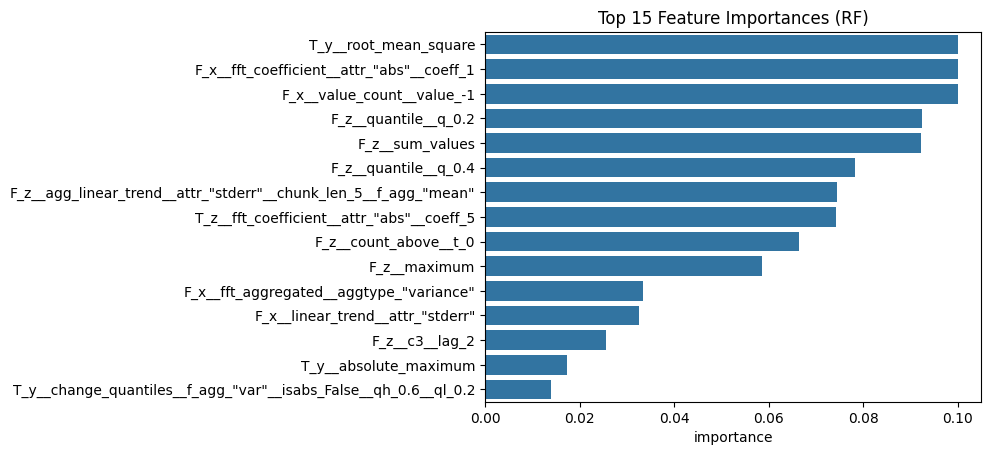

In [23]:
# feature_importance of RandomForest
import seaborn as sns

rl_fi = pd.DataFrame(
    {'feature_name': comprehensive_features_train.columns,
     'importance': rf_clf.feature_importances_})
rl_fi = rl_fi.sort_values('importance', ascending=False)

sns.barplot(data = rl_fi[:15], y = 'feature_name', x='importance', ).set_ylabel("")
plt.title('Top 15 Feature Importances (RF)')

`XGBoost`에서 주로 쓰였던 'F_x_abs_energy`는 리스트에 없었고, 다른 특징들이 다수 식별되었음

              precision    recall  f1-score   support

       False       1.00      0.94      0.97        16
        True       0.83      1.00      0.91         5

    accuracy                           0.95        21
   macro avg       0.92      0.97      0.94        21
weighted avg       0.96      0.95      0.95        21



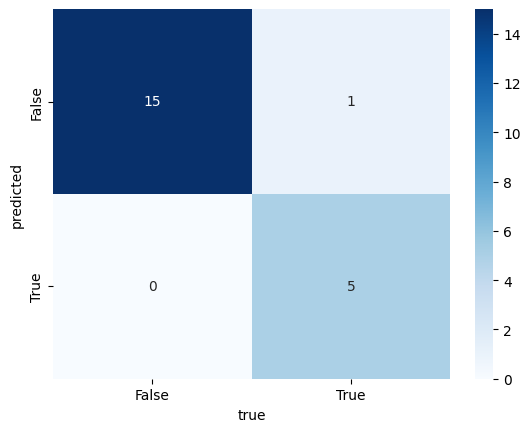

In [24]:
# ⑥-9 : Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

y_pred = rf_clf.predict(comprehensive_features_test)

#classification_report(y_test, rf_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)
print(classification_report(y_test, y_pred))

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel("true")
plt.ylabel("predicted")
plt.show()


In [25]:
y_test[y_test != y_pred].index ## 오분류된 id : 33번

Index([33], dtype='int64')

1개만 오분류한 것을 확인할 수 있습니다.

여기서 흥미로운 점은 True는 모두 맞췄다는 부분입니다.

In [26]:
# (추가)교차검증
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

for n_fold in range(3,6):
  scores_kfold = cross_val_score(estimator = rf_clf, X = comprehensive_features_train, y = y_train,
                  cv = KFold(n_splits=n_fold), scoring="accuracy"
                  )

  scores_stfold = cross_val_score(estimator = rf_clf, X = comprehensive_features_train, y = y_train,
                  cv = StratifiedKFold(n_splits=n_fold), scoring="accuracy"
                  )

  print(f'--- 교차검증 (n_fold = {n_fold})---')
  print(f'KFold 결과: {np.mean(scores_kfold):.4f} +/- {np.std(scores_kfold):.4f}')
  print(f'StratifiedKFold 결과: {np.mean(scores_stfold):.4f} +/- {np.std(scores_stfold):.4f}')
  print()

--- 교차검증 (n_fold = 3)---
KFold 결과: 0.7826 +/- 0.3074
StratifiedKFold 결과: 0.9848 +/- 0.0214

--- 교차검증 (n_fold = 4)---
KFold 결과: 0.9853 +/- 0.0255
StratifiedKFold 결과: 0.9844 +/- 0.0271

--- 교차검증 (n_fold = 5)---
KFold 결과: 0.8143 +/- 0.3714
StratifiedKFold 결과: 0.9692 +/- 0.0377



RandomForest 교차 검증 결과,
- KFold는 `n_fold = 4`의 경우를 제외하고 샘플 수가 적긴 하지만 분류 성능의 편차가 컸음
- 이에 반해, StratifiedKFold는 모든 fold에서 robust하며, 높은 분류 성능을 보여주었음

### XGBoost

In [27]:
# ⑥-7 : XGBoost 사용 및 score 확인
import xgboost as xgb
#xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3)
xgb_clf = xgb.XGBClassifier(n_estimators = 10, max_depth = 3, random_state=20250910)

# XGBoost 모델을 학습시킵니다.
xgb_clf.fit(comprehensive_features_train, y_train)

# XGBoost 모델의 score를 확인합니다.
xgb_clf.score(comprehensive_features_test, y_test)

1.0

말이 필요없습니다. 완벽한 성능..

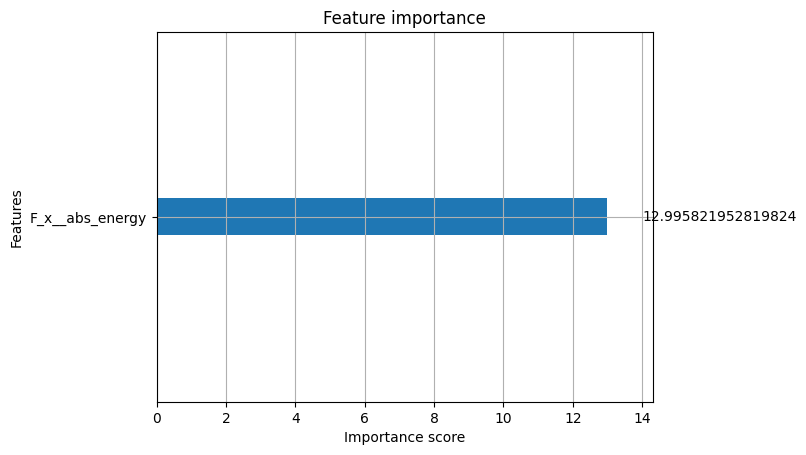

In [28]:
# ⑥-8 : XGBoost plot_importance 확인 및 시각화
# plot_importance를 통해 어떤 변수(특징)가 가장 유의미한지 확인합니다.
xgb.plot_importance(xgb_clf, importance_type = 'gain')
plt.show()

제 실습코드에서도 XGBoost 모델은 `abs_energy` 특징만을 활용하여 분류한 것을 확인하였습니다.

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        16
        True       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



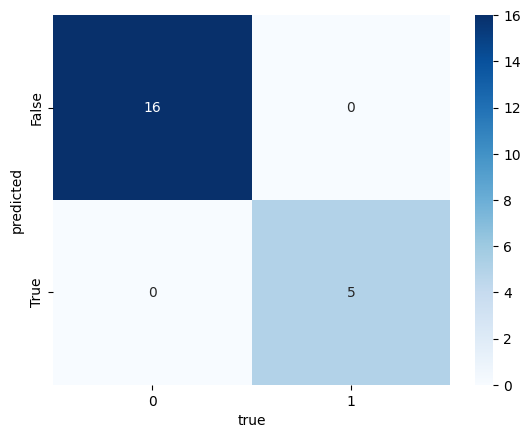

In [29]:
# ⑥-9 : Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report

y_pred = xgb_clf.predict(comprehensive_features_test)

#classification_report(y_test, xgb_clf.predict(comprehensive_features_test), target_names = ['true', 'false'], output_dict = True)
print(classification_report(y_test, y_pred))

sns.heatmap(pd.crosstab(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel("true")
plt.ylabel("predicted")
plt.show()


In [30]:
# (추가)교차검증
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

for n_fold in range(3,6):
  scores_kfold = cross_val_score(estimator = xgb_clf, X = comprehensive_features_train, y = y_train,
                  cv = KFold(n_splits=n_fold), scoring="accuracy"
                  )

  scores_stfold = cross_val_score(estimator = xgb_clf, X = comprehensive_features_train, y = y_train,
                  cv = StratifiedKFold(n_splits=n_fold), scoring="accuracy"
                  )

  print(f'--- 교차검증 (n_fold = {n_fold})---')
  print(f'KFold 결과: {np.mean(scores_kfold):.4f} +/- {np.std(scores_kfold):.4f}')
  print(f'StratifiedKFold 결과: {np.mean(scores_stfold):.4f} +/- {np.std(scores_stfold):.4f}')
  print()

--- 교차검증 (n_fold = 3)---
KFold 결과: 0.6614 +/- 0.2668
StratifiedKFold 결과: 0.9697 +/- 0.0429

--- 교차검증 (n_fold = 4)---
KFold 결과: 0.7932 +/- 0.3231
StratifiedKFold 결과: 0.9844 +/- 0.0271

--- 교차검증 (n_fold = 5)---
KFold 결과: 0.7989 +/- 0.3650
StratifiedKFold 결과: 0.9846 +/- 0.0308



XGBoost 교차 검증 결과,
- 교차검증 결과는 holdout과 역시 다르게 나타났습니다.

- `KFold`는 모든 fold에서 분류 성능의 편차가 컸음
- 이에 반해, `StratifiedKFold`는 모든 fold에서 robust하며, 높은 분류 성능을 보여주었으며 그중 n_fold가 3 또는 4일 때 가장 좋은 성능을 보여줌

### StackingClassifier
___
위에서 활용된 `RandomForest`와 `XGBoost`를 함께 분류기로 학습시켰습니다

In [31]:
# StacikingClassifier 사용 및 score 확인

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# base model
estimators = [('rf', rf_clf), ('xgb', xgb_clf)]

# meta classifier
meta_classifier = LogisticRegression(max_iter = 1000)

# stacking classifier 정의
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)
stacking_clf

# stacking_clf 모델을 학습시킵니다.
stacking_clf.fit(comprehensive_features_train, y_train)

# stacking_clf 모델의 score를 확인합니다.
stacking_clf.score(comprehensive_features_test, y_test)

1.0

역시 예상대로 `1.0` 입니다.

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        16
        True       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



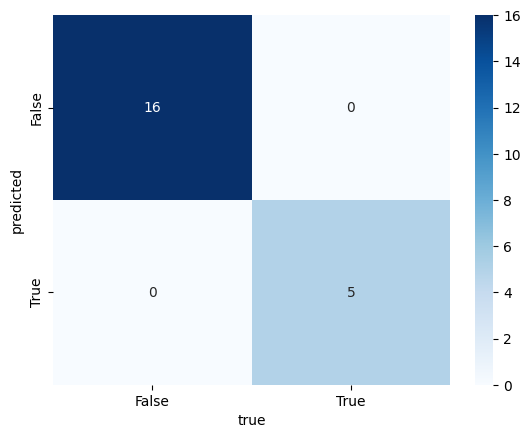

In [32]:
# Classification report를 통한 검증 및 분석
from sklearn.metrics import classification_report
import seaborn as sns

y_pred_stacked = stacking_clf.predict(comprehensive_features_test)

print(classification_report(y_test, y_pred_stacked))

sns.heatmap(pd.crosstab(y_test, y_pred_stacked), annot=True, cmap='Blues')
plt.xlabel("true")
plt.ylabel("predicted")
plt.show()

In [33]:
# (추가)교차검증
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

for n_fold in range(3,6):
  scores_kfold = cross_val_score(estimator = stacking_clf, X = comprehensive_features_train, y = y_train,
                  cv = KFold(n_splits=n_fold), scoring="accuracy"
                  )

  scores_stfold = cross_val_score(estimator = stacking_clf, X = comprehensive_features_train, y = y_train,
                  cv = StratifiedKFold(n_splits=n_fold), scoring="accuracy"
                  )

  print(f'--- 교차검증 (n_fold = {n_fold})---')
  print(f'KFold 결과: {np.mean(scores_kfold):.4f} +/- {np.std(scores_kfold):.4f}')
  print(f'StratifiedKFold 결과: {np.mean(scores_stfold):.4f} +/- {np.std(scores_stfold):.4f}')
  print()

--- 교차검증 (n_fold = 3)---
KFold 결과: nan +/- nan
StratifiedKFold 결과: 0.9848 +/- 0.0214

--- 교차검증 (n_fold = 4)---
KFold 결과: 0.8088 +/- 0.3311
StratifiedKFold 결과: 1.0000 +/- 0.0000

--- 교차검증 (n_fold = 5)---
KFold 결과: 0.8143 +/- 0.3714
StratifiedKFold 결과: 1.0000 +/- 0.0000



총평
___
- 분류 성능이 좋지 않을 경우, 로그 변환 혹은 차분을 활용해볼 계획이었습니다.
- 하지만 실습 데이터가 분류가 잘 되는 데이터였는지 성능이 좋게나왔습니다.
- 추후 분석 시 다른 시계열 데이터에 대한 특징 추출 및 전처리 시 원활히 분석을 하려면, 이 소스에 활용된 `ts.fresh` 라이브러리 함수들에 대해 좀 더 깊게 알아볼 필요가 있을 것 같습니다.


